In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("archivelog.csv")


In [ ]:
# Check for NaT values after conversion
df["timestamp"] = pd.to_datetime(df["timestamp"].str.replace("@", ""), format="%b %d, %Y %H:%M:%S.%f", errors="coerce")
print(df["timestamp"].isna().sum())


0


<ipython-input-20-b16d88543180>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="magma")


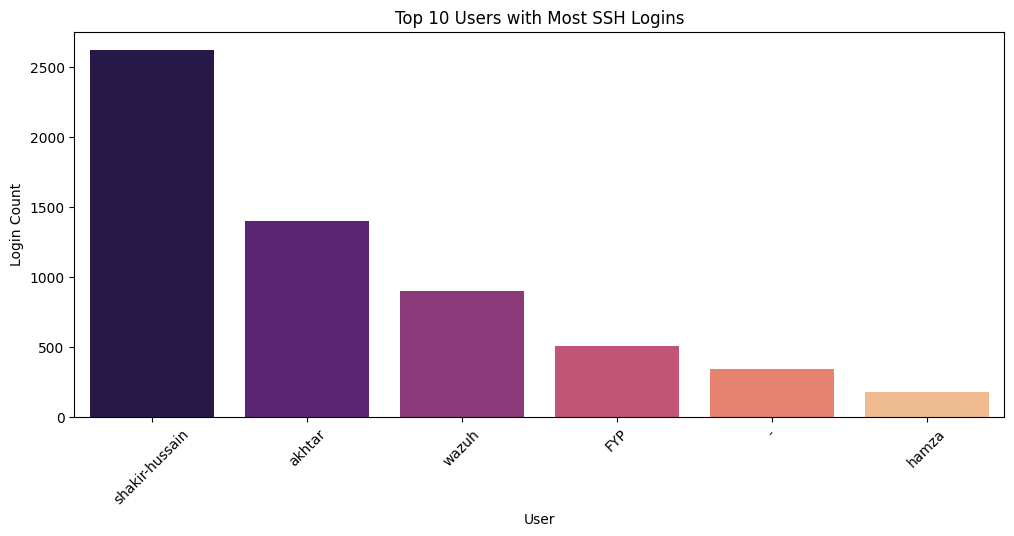

In [ ]:
# Top users with most login attempts
top_users = df["data.dstuser"].value_counts().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_users.index, y=top_users.values, palette="magma")
plt.title("Top 10 Users with Most SSH Logins")
plt.xlabel("User")
plt.ylabel("Login Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# --- Unique Values in 'data.dstuser' ---
unique_values = df["data.dstuser"].unique()
unique_count = df["data.dstuser"].nunique()
print(f"Total unique values in column: {unique_count}")
print("Unique values:", unique_values)


Total unique values in column: 6
Unique values: ['akhtar' 'shakir-hussain' 'wazuh' 'FYP' '-' 'hamza']


In [ ]:
df = df[df["data.dstuser"] != "-"]
df = df.reset_index(drop=True)
print(df.head())

                timestamp data.dstuser   data.srcip data.srcport  \
0 2025-02-26 20:34:08.899       akhtar  10.10.90.75        50526   
1 2025-02-26 20:34:08.736       akhtar  10.10.90.75        50518   
2 2025-02-26 20:34:08.586       akhtar  10.10.90.75        50510   
3 2025-02-26 20:34:08.526       akhtar  10.10.90.75        50502   
4 2025-02-26 20:34:08.284       akhtar  10.10.90.75        50489   

                                            full_log  \
0  2025-02-21T12:26:34.400326+05:00 akhtar-Virtua...   
1  2025-02-21T12:23:01.984994+05:00 akhtar-Virtua...   
2  2025-02-21T12:19:29.570469+05:00 akhtar-Virtua...   
3  2025-02-21T12:15:57.217986+05:00 akhtar-Virtua...   
4  2025-02-21T12:12:24.895395+05:00 akhtar-Virtua...   

                rule.description  rule.level  
0  sshd: authentication success.           3  
1  sshd: authentication success.           3  
2  sshd: authentication success.           3  
3  sshd: authentication success.           3  
4  sshd: authentica

<ipython-input-23-b7ce14f04e34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ips.values, y=top_ips.index, palette="magma")


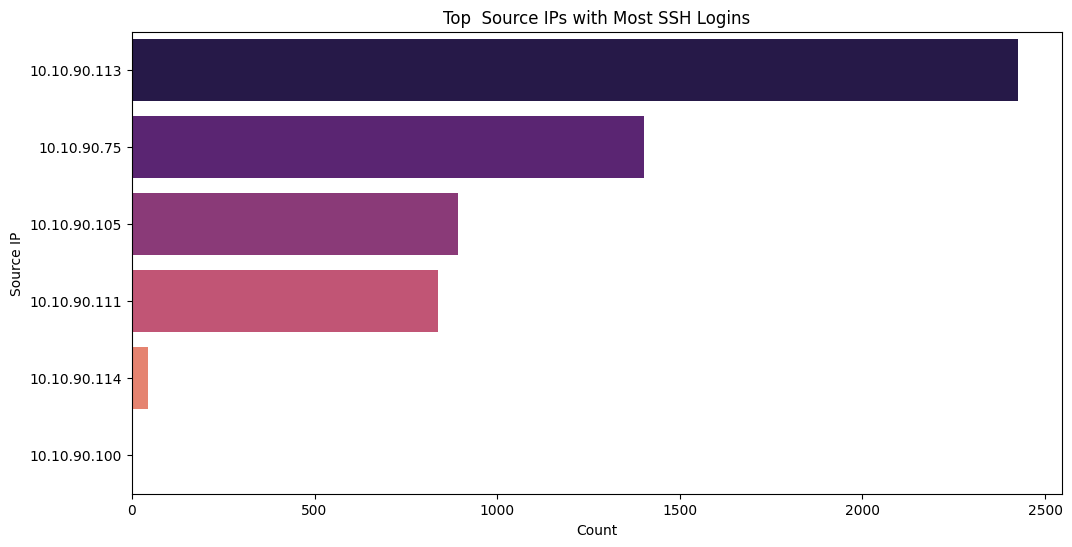

In [ ]:
# --- Top Source IPs with Most SSH Logins ---
plt.figure(figsize=(12, 6))
top_ips = df["data.srcip"].value_counts().nlargest(10)
sns.barplot(x=top_ips.values, y=top_ips.index, palette="magma")
plt.title("Top  Source IPs with Most SSH Logins")
plt.xlabel("Count")
plt.ylabel("Source IP")
plt.show()

<ipython-input-24-8248d3e375c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["rule.description"], order=df["rule.description"].value_counts().index, palette="Set2")


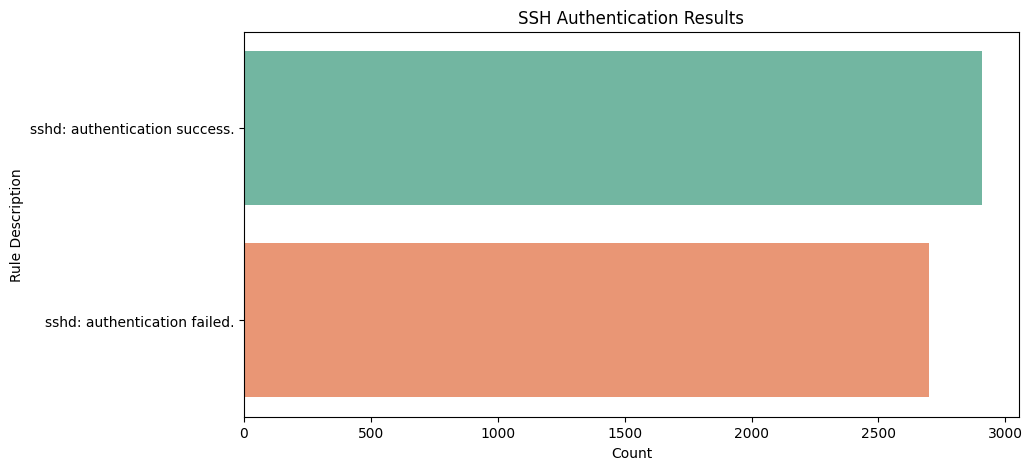

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["rule.description"], order=df["rule.description"].value_counts().index, palette="Set2")
plt.title("SSH Authentication Results")
plt.xlabel("Count")
plt.ylabel("Rule Description")
plt.show()

<ipython-input-25-a0a39fe26528>:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_minute = df.resample("T").size()  # 'T' for minutes
<ipython-input-25-a0a39fe26528>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_hour = df.resample("H").size()  # 'H' for hours
<ipython-input-25-a0a39fe26528>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampled_hour.index.strftime("%Y-%m-%d %H:%M"),


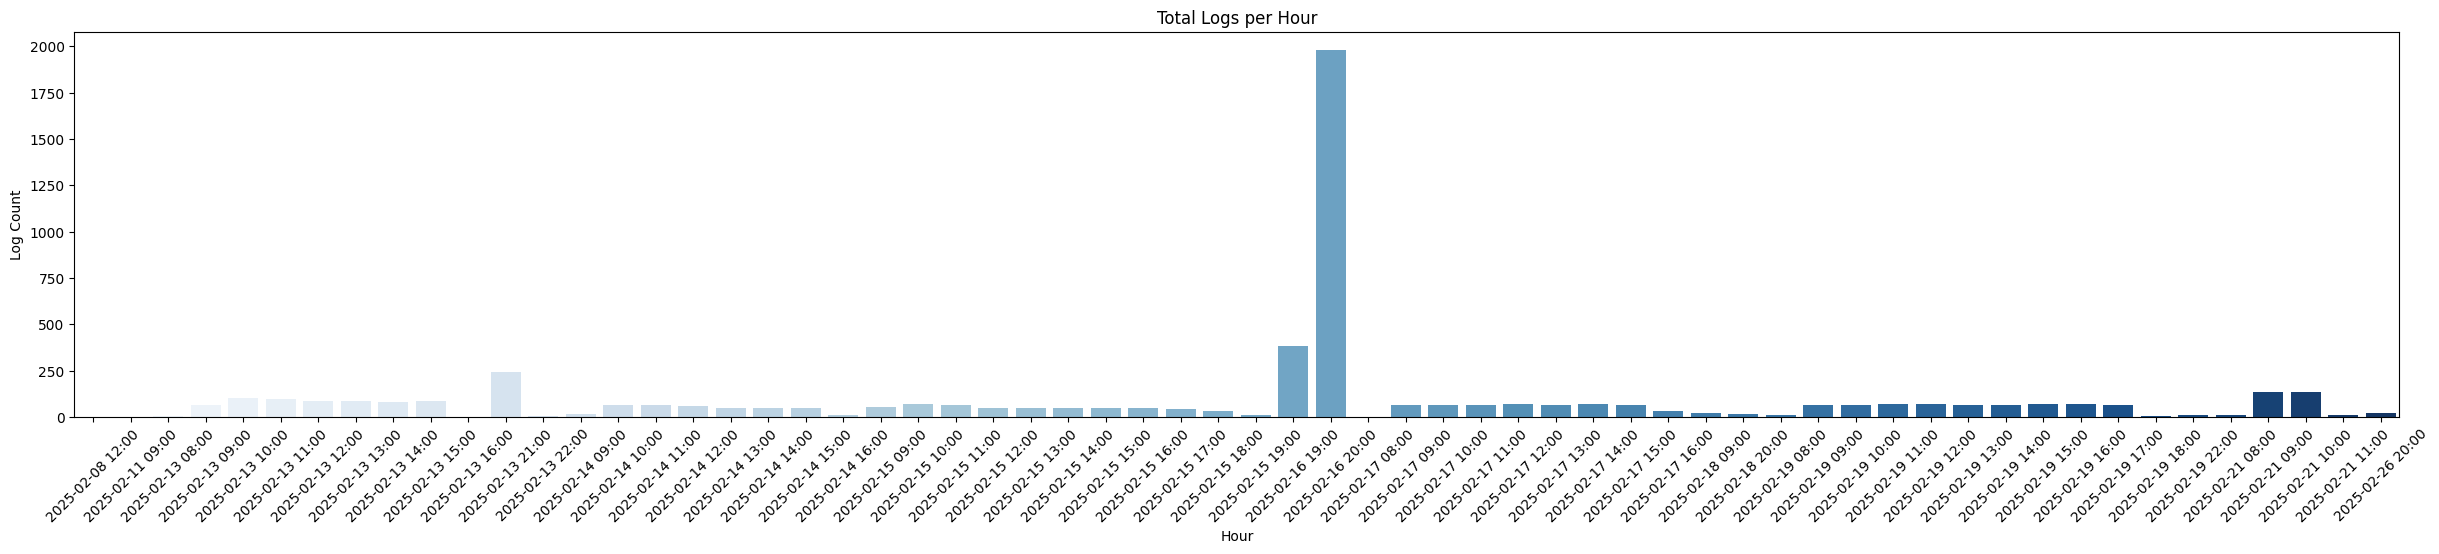

In [ ]:

# Convert timestamp column to datetime and set as index
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.set_index("timestamp")

# Resample logs per minute, hour, and day
resampled_minute = df.resample("T").size()  # 'T' for minutes
resampled_hour = df.resample("H").size()  # 'H' for hours
resampled_day = df.resample("D").size()  # 'D' for days

# Remove empty bins (zeros)
resampled_minute = resampled_minute[resampled_minute > 0]
resampled_hour = resampled_hour[resampled_hour > 0]
resampled_day = resampled_day[resampled_day > 0]



# Plot total logs per hour
plt.figure(figsize=(30, 5))
sns.barplot(x=resampled_hour.index.strftime("%Y-%m-%d %H:%M"),
            y=resampled_hour.values,
            palette="Blues")

plt.title("Total Logs per Hour")
plt.xlabel("Hour")
plt.ylabel("Log Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-26-d3a6cbcc1785>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampled_day.index.astype(str), y=resampled_day.values, palette="coolwarm")


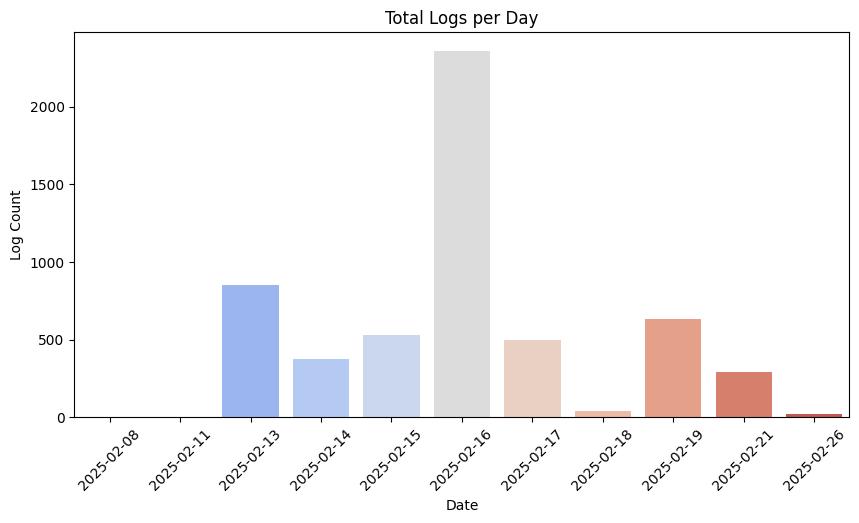

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=resampled_day.index.astype(str), y=resampled_day.values, palette="coolwarm")
plt.title("Total Logs per Day")
plt.xlabel("Date")
plt.ylabel("Log Count")
plt.xticks(rotation=45)
plt.show()

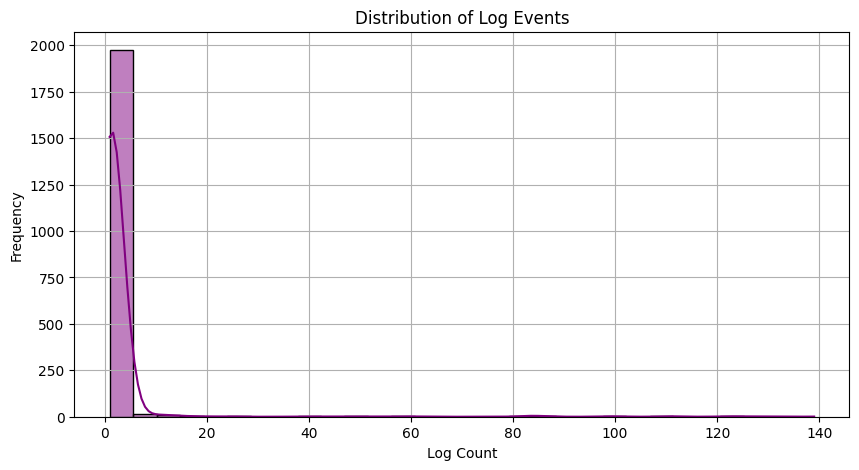

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(resampled_minute.values, bins=30, kde=True, color="purple")
plt.title("Distribution of Log Events")
plt.xlabel("Log Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv("archivelog.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"].str.replace("@", ""), format="%b %d, %Y %H:%M:%S.%f", errors="coerce")


# Extract date and time components
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute
df["second"] = df["timestamp"].dt.second

# Check for rows where timestamp conversion failed
missing_timestamps = df["timestamp"].isna().sum()

# Display first few rows
print(df.head())


                timestamp data.dstuser   data.srcip data.srcport  \
0 2025-02-26 20:34:08.899       akhtar  10.10.90.75        50526   
1 2025-02-26 20:34:08.736       akhtar  10.10.90.75        50518   
2 2025-02-26 20:34:08.586       akhtar  10.10.90.75        50510   
3 2025-02-26 20:34:08.526       akhtar  10.10.90.75        50502   
4 2025-02-26 20:34:08.284       akhtar  10.10.90.75        50489   

                                            full_log  \
0  2025-02-21T12:26:34.400326+05:00 akhtar-Virtua...   
1  2025-02-21T12:23:01.984994+05:00 akhtar-Virtua...   
2  2025-02-21T12:19:29.570469+05:00 akhtar-Virtua...   
3  2025-02-21T12:15:57.217986+05:00 akhtar-Virtua...   
4  2025-02-21T12:12:24.895395+05:00 akhtar-Virtua...   

                rule.description  rule.level  year  month  day  hour  minute  \
0  sshd: authentication success.           3  2025      2   26    20      34   
1  sshd: authentication success.           3  2025      2   26    20      34   
2  sshd: authe

In [ ]:
import re

def extract_log_features(log):
    match = re.search(r'(\bAccepted\b|\bFailed\b) password for (\w+) from ([\d\.]+) port (\d+)', log)
    if match:
        return match.group(1), match.group(2), match.group(3), match.group(4)
    return None, None, None, None

df["auth_status"], df["log_user"], df["log_ip"], df["log_port"] = zip(*df["full_log"].map(extract_log_features))

df.head()

,timestamp,data.dstuser,data.srcip,data.srcport,full_log,rule.description,rule.level,year,month,day,hour,minute,second,auth_status,log_user,log_ip,log_port
0,2025-02-26 20:34:08.899,akhtar,10.10.90.75,50526,2025-02-21T12:26:34.400326+05:00 akhtar-Virtua...,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted,akhtar,10.10.90.75,50526
1,2025-02-26 20:34:08.736,akhtar,10.10.90.75,50518,2025-02-21T12:23:01.984994+05:00 akhtar-Virtua...,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted,akhtar,10.10.90.75,50518
2,2025-02-26 20:34:08.586,akhtar,10.10.90.75,50510,2025-02-21T12:19:29.570469+05:00 akhtar-Virtua...,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted,akhtar,10.10.90.75,50510
3,2025-02-26 20:34:08.526,akhtar,10.10.90.75,50502,2025-02-21T12:15:57.217986+05:00 akhtar-Virtua...,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted,akhtar,10.10.90.75,50502
4,2025-02-26 20:34:08.284,akhtar,10.10.90.75,50489,2025-02-21T12:12:24.895395+05:00 akhtar-Virtua...,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted,akhtar,10.10.90.75,50489


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         5946 non-null   datetime64[ns]
 1   data.dstuser      5946 non-null   object        
 2   data.srcip        5946 non-null   object        
 3   data.srcport      5946 non-null   object        
 4   full_log          5946 non-null   object        
 5   rule.description  5946 non-null   object        
 6   rule.level        5946 non-null   int64         
 7   year              5946 non-null   int32         
 8   month             5946 non-null   int32         
 9   day               5946 non-null   int32         
 10  hour              5946 non-null   int32         
 11  minute            5946 non-null   int32         
 12  second            5946 non-null   int32         
 13  auth_status       3266 non-null   object        
 14  log_user          3266 n

In [ ]:
df.drop(columns=["timestamp", "full_log","log_user","log_ip","log_port"], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data.dstuser      5946 non-null   object
 1   data.srcip        5946 non-null   object
 2   data.srcport      5946 non-null   object
 3   rule.description  5946 non-null   object
 4   rule.level        5946 non-null   int64 
 5   year              5946 non-null   int32 
 6   month             5946 non-null   int32 
 7   day               5946 non-null   int32 
 8   hour              5946 non-null   int32 
 9   minute            5946 non-null   int32 
 10  second            5946 non-null   int32 
 11  auth_status       3266 non-null   object
dtypes: int32(6), int64(1), object(5)
memory usage: 418.2+ KB


In [ ]:
df.head()

,data.dstuser,data.srcip,data.srcport,rule.description,rule.level,year,month,day,hour,minute,second,auth_status
0,akhtar,10.10.90.75,50526,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted
1,akhtar,10.10.90.75,50518,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted
2,akhtar,10.10.90.75,50510,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted
3,akhtar,10.10.90.75,50502,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted
4,akhtar,10.10.90.75,50489,sshd: authentication success.,3,2025,2,26,20,34,8,Accepted


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["data.dstuser"] = encoder.fit_transform(df["data.dstuser"])

df["data.srcip"] = encoder.fit_transform(df["data.srcip"])

df["rule.description"] = encoder.fit_transform(df["rule.description"])

df["auth_status"] = encoder.fit_transform(df["auth_status"])

print(df.head())

   data.dstuser  data.srcip data.srcport  rule.description  rule.level  year  \
0             2           6        50526                 1           3  2025   
1             2           6        50518                 1           3  2025   
2             2           6        50510                 1           3  2025   
3             2           6        50502                 1           3  2025   
4             2           6        50489                 1           3  2025   

   month  day  hour  minute  second  auth_status  
0      2   26    20      34       8            0  
1      2   26    20      34       8            0  
2      2   26    20      34       8            0  
3      2   26    20      34       8            0  
4      2   26    20      34       8            0  


In [ ]:
df.head()

,data.dstuser,data.srcip,data.srcport,rule.description,rule.level,year,month,day,hour,minute,second,auth_status
0,2,6,50526,1,3,2025,2,26,20,34,8,0
1,2,6,50518,1,3,2025,2,26,20,34,8,0
2,2,6,50510,1,3,2025,2,26,20,34,8,0
3,2,6,50502,1,3,2025,2,26,20,34,8,0
4,2,6,50489,1,3,2025,2,26,20,34,8,0


In [ ]:
df["data.srcport"] = pd.to_numeric(df["data.srcport"], errors="coerce")
print(df.dtypes)

data.dstuser          int64
data.srcip            int64
data.srcport        float64
rule.description      int64
rule.level            int64
year                  int32
month                 int32
day                   int32
hour                  int32
minute                int32
second                int32
auth_status           int64
dtype: object


In [ ]:
df["data.srcport"] = df["data.srcport"].fillna(method="ffill")  # Forward fill NaN
df["data.srcport"] = df["data.srcport"].replace("-", method="ffill")  # Handle "-"
df["data.srcport"] = pd.to_numeric(df["data.srcport"], errors="coerce").astype("Int64")  # Convert safely



<ipython-input-46-9319ba2cb97b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["data.srcport"] = df["data.srcport"].fillna(method="ffill")  # Forward fill NaN
<ipython-input-46-9319ba2cb97b>:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df["data.srcport"] = df["data.srcport"].replace("-", method="ffill")  # Handle "-"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   data.dstuser      5946 non-null   int64
 1   data.srcip        5946 non-null   int64
 2   data.srcport      5946 non-null   Int64
 3   rule.description  5946 non-null   int64
 4   rule.level        5946 non-null   int64
 5   year              5946 non-null   int32
 6   month             5946 non-null   int32
 7   day               5946 non-null   int32
 8   hour              5946 non-null   int32
 9   minute            5946 non-null   int32
 10  second            5946 non-null   int32
 11  auth_status       5946 non-null   int64
dtypes: Int64(1), int32(6), int64(5)
memory usage: 424.0 KB


In [ ]:
df.head()

,data.dstuser,data.srcip,data.srcport,rule.description,rule.level,year,month,day,hour,minute,second,auth_status
0,2,6,50526,1,3,2025,2,26,20,34,8,0
1,2,6,50518,1,3,2025,2,26,20,34,8,0
2,2,6,50510,1,3,2025,2,26,20,34,8,0
3,2,6,50502,1,3,2025,2,26,20,34,8,0
4,2,6,50489,1,3,2025,2,26,20,34,8,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest



# Select features
features = ["data.dstuser", "data.srcip", "data.srcport", "rule.description",
            "rule.level", "year", "month", "day", "hour", "minute", "second", "auth_status"]
X = df[features]

# Train Isolation Forest on full dataset
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
df["anomaly"] = model.predict(X)

# Count anomalies
print(df["anomaly"].value_counts())

# Show detected anomalies
anomalies = df[df["anomaly"] == -1]
print(anomalies)


anomaly
 1    5325
-1     281
Name: count, dtype: int64
      data.dstuser  data.srcip  data.srcport  rule.description  rule.level  \
0                1           5         50526                 1           3   
1                1           5         50518                 1           3   
2                1           5         50510                 1           3   
3                1           5         50502                 1           3   
4                1           5         50489                 1           3   
...            ...         ...           ...               ...         ...   
5533             2           4         37208                 1           3   
5535             1           5         50191                 0           5   
5540             4           5         50184                 0           5   
5547             4           5         50174                 0           5   
5600             3           2         37206                 1           3   

      y

anomaly
 1    5325
-1     281
Name: count, dtype: int64


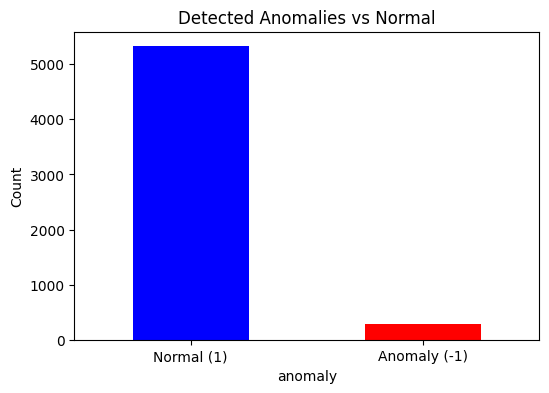

In [ ]:
import matplotlib.pyplot as plt

# Count normal vs. anomalies
print(df["anomaly"].value_counts())

# Plot anomalies vs. normal data
plt.figure(figsize=(6,4))
df["anomaly"].value_counts().plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Normal (1)", "Anomaly (-1)"], rotation=0)
plt.ylabel("Count")
plt.title("Detected Anomalies vs Normal")
plt.show()


In [ ]:
print(df[df["anomaly"] == -1].head(10))  # Show first 10 anomalies


   data.dstuser  data.srcip  data.srcport  rule.description  rule.level  year  \
0             1           5         50526                 1           3  2025   
1             1           5         50518                 1           3  2025   
2             1           5         50510                 1           3  2025   
3             1           5         50502                 1           3  2025   
4             1           5         50489                 1           3  2025   
5             1           5         50475                 1           3  2025   
6             1           5         50452                 1           3  2025   
7             1           5         50444                 1           3  2025   
8             1           5         50435                 1           3  2025   
9             1           5         50427                 1           3  2025   

   month  day  hour  minute  second  auth_status  anomaly  
0      2   26    20      34       8            0

In [ ]:
print(df[df["anomaly"] == 1].head(10))  # Show normal instances


    data.dstuser  data.srcip  data.srcport  rule.description  rule.level  \
24             3           2         51338                 1           3   
25             4           1         55970                 1           3   
26             4           1         55970                 1           3   
27             0           3         52850                 1           3   
28             0           3         52850                 1           3   
29             1           5         50247                 1           3   
30             1           5         50247                 1           3   
31             3           2         49582                 1           3   
32             3           2         49582                 1           3   
33             4           1         41978                 1           3   

    year  month  day  hour  minute  second  auth_status  anomaly  
24  2025      2   21    11       3      35            2        1  
25  2025      2   21    11   

In [ ]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.05, kernel="rbf", gamma="auto")  # Adjust nu (anomaly fraction)
df["anomaly"] = svm.fit_predict(X)


In [ ]:
print(df["anomaly"].value_counts())

anomaly
 1    3115
-1    2491
Name: count, dtype: int64


In [ ]:
df["anomaly_score"] = svm.decision_function(X)
print(df[["anomaly", "anomaly_score"]].head())


   anomaly  anomaly_score
0       -1      -0.000080
1       -1      -0.000373
2       -1      -0.000310
3       -1      -0.000038
4        1       0.000292
